In [1]:
import numpy as np
from sklearn.metrics import r2_score
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
import pandas as pd

In [6]:
stock_data = yf.download("9432.T",period="5y")
print(stock_data.head(5))
print(stock_data.tail(5))

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker         9432.T     9432.T     9432.T     9432.T     9432.T
Date                                                             
2020-06-04  84.697716  85.070388  83.190097  83.190097  178060000
2020-06-05  85.070389  85.629390  84.528324  85.375301  157775000
2020-06-08  85.781845  86.052878  85.087324  86.052878  135617500
2020-06-09  86.340843  86.781268  85.747955  86.645755  156410000
2020-06-10  85.104263  85.900417  85.104263  85.426112  137827500
Price            Close        High         Low        Open     Volume
Ticker          9432.T      9432.T      9432.T      9432.T     9432.T
Date                                                                 
2025-05-29  155.899994  156.800003  154.800003  155.000000  188049400
2025-05-30  160.399994  160.600006  155.100006  155.699997  365574500
2025-06-02  157.000000  160.199997  156.800003  160.000000  164821600
2025-06-03  158.899994  159.000000  156.800003  158.

In [8]:
# 株価データの取得
import yfinance as yf
import pandas as pd

# データ期間を5年に延長
ticker = "7203.T"
df = yf.download(ticker, period="5y")

# 1週間後の終値を予測するための目的変数を作成
df["Target"] = df["Close"].shift(-5)  # 5営業日後

# 欠損値を除去
df = df.dropna()

# データ数を確認
print("データ数:", len(df))

# 特徴量と目的変数の分割
X = df[["Open", "High", "Low", "Close", "Volume"]]
y = df["Target"]

# データ数が十分か確認
if len(df) < 10:
    raise ValueError("データ数が少なすぎます。期間をさらに延長してください。")

# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# モデルの構築と学習
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 予測と評価
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# 1週間後の株価予測
latest = df[["Open", "High", "Low", "Close", "Volume"]].iloc[[-1]]
predicted_price = model.predict(latest)
print("1週間後の予測株価:", predicted_price[0])

[*********************100%***********************]  1 of 1 completed


データ数: 1218
MSE: 42558.18332318817
1週間後の予測株価: 2623.2168310546876


In [10]:
# 株価データの取得
import yfinance as yf
import pandas as pd

ticker = "7203.T"
df = yf.download(ticker, period="5y")

# 1週間前の特徴量で今日の終値を予測
df["Open_lag7"] = df["Open"].shift(5)
df["High_lag7"] = df["High"].shift(5)
df["Low_lag7"] = df["Low"].shift(5)
df["Close_lag7"] = df["Close"].shift(5)
df["Volume_lag7"] = df["Volume"].shift(5)

# 欠損値を除去
df = df.dropna()

# 特徴量と目的変数の分割
X = df[["Open_lag7", "High_lag7", "Low_lag7", "Close_lag7", "Volume_lag7"]]
y = df["Close"]

# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# モデルの構築と学習
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 予測と評価
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# 1週間前までのデータで今日の株価を予測
latest = df[["Open_lag7", "High_lag7", "Low_lag7", "Close_lag7", "Volume_lag7"]].iloc[[-1]]
predicted_price = model.predict(latest)
print("1週間前までのデータで予測した今日の株価:", predicted_price[0])
print("実際の今日の株価:", df["Close"].iloc[-1])

[*********************100%***********************]  1 of 1 completed
C:\Users\ryota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 43124.87181392511
1週間前までのデータで予測した今日の株価: 2625.1587646484377
実際の今日の株価: Ticker
7203.T    2724.5
Name: 2025-06-04 00:00:00, dtype: float64


In [46]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

ticker = "7203.T"
df = yf.download(ticker, period="5y", interval="1d")

# テクニカル指標の追加
df["MA5"] = df["Close"].rolling(window=5).mean()
df["MA25"] = df["Close"].rolling(window=25).mean()
df["STD5"] = df["Close"].rolling(window=5).std()
df["Return"] = df["Close"].pct_change()

# 1週間前の特徴量
df["Open_lag7"] = df["Open"].shift(5)
df["High_lag7"] = df["High"].shift(5)
df["Low_lag7"] = df["Low"].shift(5)
df["Close_lag7"] = df["Close"].shift(5)
df["Volume_lag7"] = df["Volume"].shift(5)
df["MA5_lag7"] = df["MA5"].shift(5)
df["STD5_lag7"] = df["STD5"].shift(5)
df["Return_lag7"] = df["Return"].shift(5)

# 欠損値除去
df = df.dropna()

# 特徴量と目的変数
features = [
    "Open_lag7",
    "High_lag7",
    "Low_lag7",
    "Close_lag7",
    "Volume_lag7",
    "MA5_lag7",
    "STD5_lag7",
    "Return_lag7"
]
X = df[features]
y = df["Close"]

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle=False, test_size=0.2)

# パラメータ範囲を指定
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# ランダムサーチ
rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42
)
search.fit(X_train, y_train)

print("最適パラメータ:", search.best_params_)

# 最適モデルで予測
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("最適モデルのMSE:", mse)

# 1週間前までのデータで今日の株価を予測
latest = scaler.transform([df[features].iloc[-1]])
predicted_price = best_model.predict(latest)
print("1週間前までのデータで予測した今日の株価:", predicted_price[0])
print("実際の今日の株価:", df['Close'].iloc[-1])

[*********************100%***********************]  1 of 1 completed


Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\ryota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ryota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ryota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

最適パラメータ: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}
最適モデルのMSE: 38887.529134972814
1週間前までのデータで予測した今日の株価: 2609.7477074289186
実際の今日の株価: Ticker
7203.T    2724.5
Name: 2025-06-04 00:00:00, dtype: float64


In [49]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

ticker = "7203.T"
df = yf.download(ticker, period="5y", interval="1d")

# テクニカル指標の追加
df["MA5"] = df["Close"].rolling(window=5).mean()
df["MA25"] = df["Close"].rolling(window=25).mean()
df["STD5"] = df["Close"].rolling(window=5).std()
df["Return"] = df["Close"].pct_change()

# 1週間前の特徴量
df["Open_lag1"] = df["Open"].shift(1)
df["High_lag1"] = df["High"].shift(1)
df["Low_lag1"] = df["Low"].shift(1)
df["Close_lag1"] = df["Close"].shift(1)
df["Volume_lag1"] = df["Volume"].shift(1)
df["MA5_lag1"] = df["MA5"].shift(1)
df["STD5_lag1"] = df["STD5"].shift(1)
df["Return_lag1"] = df["Return"].shift(1)

# 欠損値除去
df = df.dropna()

# 特徴量と目的変数
features = [
    "Open_lag1",
    "High_lag1",
    "Low_lag1",
    "Close_lag1",
    "Volume_lag1",
    "MA5_lag1",
    "STD5_lag1",
    "Return_lag1"
]
X = df[features]
y = df["Close"]

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle=False, test_size=0.2)

# パラメータ範囲を指定
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# ランダムサーチ
rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42
)
search.fit(X_train, y_train)

print("最適パラメータ:", search.best_params_)

# 最適モデルで予測
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("最適モデルのMSE:", mse)

# 1週間前までのデータで今日の株価を予測
latest = scaler.transform([df[features].iloc[-1]])
predicted_price = best_model.predict(latest)
print("1週間前までのデータで予測した今日の株価:", predicted_price[0])
print("実際の今日の株価:", df['Close'].iloc[-1])

[*********************100%***********************]  1 of 1 completed


Fitting 3 folds for each of 20 candidates, totalling 60 fits
最適パラメータ: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 25}
最適モデルのMSE: 6791.676567441479
1週間前までのデータで予測した今日の株価: 2660.7236605805897
実際の今日の株価: Ticker
7203.T    2724.5
Name: 2025-06-04 00:00:00, dtype: float64


C:\Users\ryota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ryota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ryota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

In [48]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

ticker = "7203.T"
df = yf.download(ticker, period="5y", interval="1d")

# テクニカル指標の追加
df["MA5"] = df["Close"].rolling(window=5).mean()
df["MA25"] = df["Close"].rolling(window=25).mean()
df["STD5"] = df["Close"].rolling(window=5).std()
df["Return"] = df["Close"].pct_change()

# 1日前の特徴量
df["Open_lag1"] = df["Open"].shift(1)
df["High_lag1"] = df["High"].shift(1)
df["Low_lag1"] = df["Low"].shift(1)
df["Close_lag1"] = df["Close"].shift(1)
df["Volume_lag1"] = df["Volume"].shift(1)
df["MA5_lag1"] = df["MA5"].shift(1)
df["STD5_lag1"] = df["STD5"].shift(1)
df["Return_lag1"] = df["Return"].shift(1)

# 1日後の終値をターゲットに
df["Target"] = df["Close"].shift(-1)

# 欠損値除去
df = df.dropna()

# 特徴量と目的変数
features = [
    "Open_lag1", "High_lag1", "Low_lag1", "Close_lag1", "Volume_lag1",
    "MA5_lag1", "STD5_lag1", "Return_lag1"
]
X = df[features]
y = df["Target"]

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle=False, test_size=0.2)

# パラメータ範囲を指定
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# ランダムサーチ
rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42
)
search.fit(X_train, y_train)

print("最適パラメータ:", search.best_params_)

# 最適モデルで予測
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("最適モデルのMSE:", mse)

# 1日前までのデータで明日の株価を予測
latest = scaler.transform([df[features].iloc[-1]])
predicted_price = best_model.predict(latest)
print("1日前までのデータで予測した明日の株価:", predicted_price[0])
print("実際の明日の株価（データ上）:", df['Target'].iloc[-1])

[*********************100%***********************]  1 of 1 completed


Fitting 3 folds for each of 20 candidates, totalling 60 fits
最適パラメータ: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 25}
最適モデルのMSE: 12905.850344966808
1日前までのデータで予測した明日の株価: 2697.8212125738237
実際の明日の株価（データ上）: 2724.5


C:\Users\ryota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ryota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ryota\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

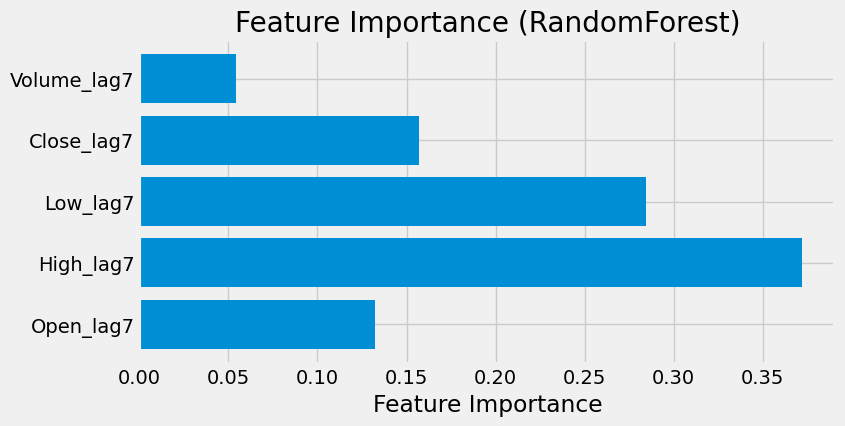

Open_lag7: 0.1321
High_lag7: 0.3721
Low_lag7: 0.2842
Close_lag7: 0.1572
Volume_lag7: 0.0543


In [45]:
# 特徴量重要度の表示
import matplotlib.pyplot as plt

importances = model.feature_importances_
# Use only the number of feature names that matches importances
feature_names = features[:len(importances)]  # 使った特徴量名リスト

plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance (RandomForest)")
plt.show()

# 重要度を数値で表示
for name, imp in zip(feature_names, importances):
    print(f"{name}: {imp:.4f}")